In [1]:
import os

os.chdir(r'G:\pycharm-workspace\2018ATEC\data')

In [2]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 350)
pd.options.display.float_format = '{:.2f}'.format

D:\Install\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
demo_dataframe = pd.read_csv("demo.csv")
display.display(demo_dataframe)
display.display(demo_dataframe.describe())
display.display(demo_dataframe.info())

,id,score
0,e43b0d4dc42f55bf5def4b6155856d9494fb7626d43bba...,0.00
1,c17d52961284a02589e5bb684caa38868191fdb64d4711...,0.00
2,dcf26d76f6d77651fc1e85d0be5dd835f0871cb72a9b03...,0.00


,score
count,3.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
id       3 non-null object
score    3 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.0+ bytes


None

In [4]:
anti_fraud_dataframe = pd.read_csv("atec_anti_fraud_train.csv")
display.display(anti_fraud_dataframe)
display.display(anti_fraud_dataframe.describe())
display.display(anti_fraud_dataframe.info())

,id,label,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
0,f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...,0,20171103,0,0,0,0,100807.00,0,5,1,1,1,1,2,0,2,0,2,2,2,1,31.00,61.00,142.00,245.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,0.00,1.00,0.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,3.00,96.00,38.00,301.00,302.00,302.00,302.00,301.00,302.00,40.00,79.00,40.00,79.00,2.00,3.00,4.00,3.00,41.00,80.00,96.50,721.10,3252.00,154.50,394.50,2.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,4.00,8.00,15.00,30.00,4.00,14.00,34.00,70.00,142.00,3.00,15.00,41.00,79.00,191.00,192.00,190.00,190.00,190.00,190.00,191.00,192.00,191.00,190.00,190.00,190.00,32.00,33.00,25.00,25.00,24.00,25.00,31.00,79.00,42.00,42.00,42.00,68.00,32.00,32.00,28.00,27.00,28.00,27.00,32.00,235.00,235.00,126.00,126.00,127.00,126.00,235.00,192.00,191.00,190.00,189.00,189.00,301.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,3.00,4.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,4.00,3.00,4.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,3.00,3.00,3.00,14.00,41.00,80.00,167.00,2.00,2.00,4.00,3.00,3.00,4.00,6.00,6.00,2.00,2.00,4.00,3.00,2.00,2.00,3.00,4.00,3.00,3.00,4.00,1.00,3.00,3.00,4.00,2.00,2.00,2.00,2.00,8.00,2.00,2.00,3.00,3.00,3.00,2.00,5.00,5.00,10.00,16.00,2.00,2.00,4.00,5.00,7.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,27.00,297.00,302.00,384.00,770.00,20.00,99.00,102.00,124.00,140.00,301.00,312.00,328.00,85.00,302.00,201.00,203.00,203.00,61.00,201.00
1,d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...,0,20170917,0,1,1,1,100805.00,1,5,2,1,1,0,2,1,2,2,1,1,2,0,14.00,13.00,48.00,48.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,1.00,0.00,1.00,1.00,2.00,4.00,4.00,5.00,1.00,1.00,4.00,3.00,3.00,79.00,12.00,302.00,32.00,301.00,302.00,302.00,302.00,23.00,26.00,23.00,26.00,2.00,2.00,3.00,4.00,23.00,26.00,5.00,717.40,733.30,231.80,472.80,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,1.00,4.00,8.00,11.00,12.00,4.00,12.00,23.00,26.00,27.00,5.00,12.00,24.00,27.00,122.00,121.00,16.00,121.00,121.00,122.00,121.00,122.00,121.00,16.00,121.00,122.00,32.00,31.00,13.00,27.00,26.00,27.00,32.00,79.00,40.00,39.00,39.00,63.00,31.00,31.00,15.00,28.00,29.00,29.00,31.00,231.00,232.00,17.00,99.00,99.00,98.00,232.00,121.00,122.00,17.00,121.00,121.00,302.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,2.00,1.00,

,label,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
count,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,794906.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,994731.00,787283.00,787283.00,787283.00,787283.00,787146.00,787146.00,787146.00,787146.00,783695.00,783695.00,783695.00,783695.00,652844.00,652844.00,652844.00,652844.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,68950.00,653070.00,653070.00,653070.00,653070.00,787283.00,787283.00,653070.00,653070.00,653070.00,653070.00,653070.00,653070.00,653070.00,653070.00,653070.00,653070.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,720827.00,720827.00,720827.00,720827.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,708446.00,708446.00,708446.00,708446.00,708446.00,720827.00,720827.00,720827.00,720827.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,724216.00,720827.00,720827.00,720827.00,720827.00,720827.00,720827.00,993812.00,993812.00,993812.00,993812.00,993812.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,993812.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.00,858710.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994731 entries, 0 to 994730
Columns: 300 entries, id to f297
dtypes: float64(279), int64(20), object(1)
memory usage: 2.2+ GB


None

In [5]:
predict_anti_fraud_dataframe = pd.read_csv("atec_anti_fraud_test_a.csv")
display.display(predict_anti_fraud_dataframe)
display.display(predict_anti_fraud_dataframe.describe())
display.display(predict_anti_fraud_dataframe.info())

,id,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
0,8e8290c270ec4bc3448dd5edd35c6f059b42d38f9ddd6f...,20180120,0,0,1,1,100809.00,1,3,2,0,1,0,1,1,2,2,1,2,2,1,1.00,15.00,0.00,92.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,2.00,5.00,4.00,1.00,1.00,3.00,4.00,4.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,3.00,4.00,4.00,6.00,24.00,60.00,60.00,1.00,2.00,3.00,3.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,3.00,2.00,3.00,2.00,1.00,2.00,2.00,3.00,2.00,2.00,1.00,10.00,11.00,2.00,2.00,1.00,3.00,4.00,2.00,2.00,3.00,12.00,13.00,2.00,1.00,2.00,5.00,7.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,7.00,1.00,2.00,3.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,71.00,171.00,301.00,337.00,385.00,31.00,75.00,122.00,130.00,130.00,302.00,302.00,302.00,134.00,302.00,215.00,215.00,215.00,94.00,214.00
1,f36c5fa5c0e7afccf733a4d74c7e06ffe43cc8fd24eda7...,20180105,1,1,0,0,100808.00,1,5,2,2,1,1,1,2,0,1,0,0,0,1,0.00,30.00,1.00,173.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,12.00,13.00,12.00,13.00,13.00,13.00,12.00,2.00,1.00,2.00,1.00,13.00,12.00,12.00,12.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,3.00,2.00,2.00,2.00,1.00,2.00,3.00,3.00,2.00,3.00,3.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,2.

,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
count,491668.00,491668.00,491668.00,491668.00,491668.00,368604.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,491668.00,370795.00,370795.00,370795.00,370795.00,370762.00,370762.00,370762.00,370762.00,369086.00,369086.00,369086.00,369086.00,318197.00,318197.00,318197.00,318197.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,26533.00,318532.00,318532.00,318532.00,318532.00,370795.00,370795.00,318532.00,318532.00,318532.00,318532.00,318532.00,318532.00,318532.00,318532.00,318532.00,318532.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,178207.00,178207.00,178207.00,178207.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,173244.00,173244.00,173244.00,173244.00,173244.00,178207.00,178207.00,178207.00,178207.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,179252.00,178207.00,178207.00,178207.00,178207.00,178207.00,178207.00,489964.00,489964.00,489964.00,489964.00,489964.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,489964.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406292.00,406

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491668 entries, 0 to 491667
Columns: 299 entries, id to f297
dtypes: float64(279), int64(19), object(1)
memory usage: 1.1+ GB


None

In [6]:
anti_fraud_dataframe.corr()

,label,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
label,1.00,0.01,0.04,0.00,0.04,0.01,0.01,0.08,-0.06,0.00,0.02,-0.00,0.03,-0.04,-0.02,-0.05,-0.03,-0.03,-0.03,-0.04,-0.01,-0.01,-0.00,-0.01,-0.00,0.03,0.03,0.02,0.02,0.13,0.13,0.19,0.19,0.05,0.05,0.04,0.04,-0.00,0.00,0.00,0.00,-0.00,0.01,0.00,0.00,-0.00,-0.00,0.08,0.08,0.05,0.04,0.04,0.04,0.17,0.16,0.08,0.06,0.02,0.02,0.01,0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,0.01,-0.00,0.01,-0.00,0.07,0.05,0.05,0.03,0.01,0.01,0.02,0.01,0.00,0.02,0.02,0.01,0.02,0.02,0.03,0.02,0.00,0.01,0.01,0.01,0.02,0.02,-0.01,-0.01,-0.01,-0.01,0.03,0.01,0.00,-0.00,-0.01,0.03,0.02,0.01,-0.00,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.00,-0.01,-0.02,-0.02,-0.03,-0.00,0.00,0.00,0.00,0.01,0.02,0.03,0.03,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.01,0.02,0.02,0.05,0.04,0.03,0.01,0.01,-0.00,-0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,0.00,0.00,0.01,0.02,0.12,0.11,0.10,0.04,0.03,0.09,0.03,0.02,0.00,0.01,0.02,0.12,0.11,0.00,0.00,0.04,0.04,0.04,0.03,-0.00,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.01,-0.02
date,0.01,1.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.01,0.00,0.01,-0.03,-0.02,-0.05,0.01,0.00,0.04,0.03,0.03,0.05,0.05,0.02,0.32,0.44,0.38,0.46,0.05,0.07,0.04,0.06,0.01,0.01,0.01,0.01,0.13,0.18,0.12,0.16,-0.01,0.02,0.05,0.10,0.20,0.04,0.06,0.07,0.09,0.13,0.00,0.00,0.12,0.17,0.12,0.15,0.04,0.06,0.00,-0.02,-0.02,0.00,0.04,-0.00,-0.01,0.02,0.06,0.13,0.02,-0.10,-0.07,-0.10,-0.10,-0.10,-0.09,-0.09,0.02,0.06,0.02,0.06,0.01,0.01,0.00,0.01,0.02,0.08,0.00,0.00,0.03,0.00,-0.00,-0.00,-0.00,0.00,0.03,0.07,-0.01,-0.01,-0.00,-0.00,0.01,0.03,0.03,0.13,0.28,0.54,0.01,-0.00,0.02,0.07,0.20,0.01,-0.00,0.02,0.07,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.07,-0.06,-0.10,-0.10,-0.10,-0.10,-0.09,-0.03,-0.10,-0.10,-0.10,-0.07,-0.08,-0.08,-0.10,-0.10,-0.10,-0.10,-0.08,-0.03,-0.03,-0.10,-0.10,-0.10,-0.10,-0.03,-0.10,-0.10,-0.10,-0.10,-0.10,-0.09,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.02,0.05,0.11,-0.

,f28,f29,f30,f31,f52,f53,f111,f112,f113,f114
count,696312.00,696312.00,696312.00,696312.00,696312.00,696312.00,696312.00,696312.00,696312.00,696312.00
mean,0.19,0.20,0.20,0.21,0.26,0.27,70.69,70.69,64.91,70.33
std,0.77,0.77,0.85,0.85,0.94,0.97,96.01,96.01,91.74,95.55
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,2.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,192.00,192.00,182.00,191.00
max,11.00,12.00,25.00,29.00,31.00,56.00,252.00,251.00,250.00,250.00


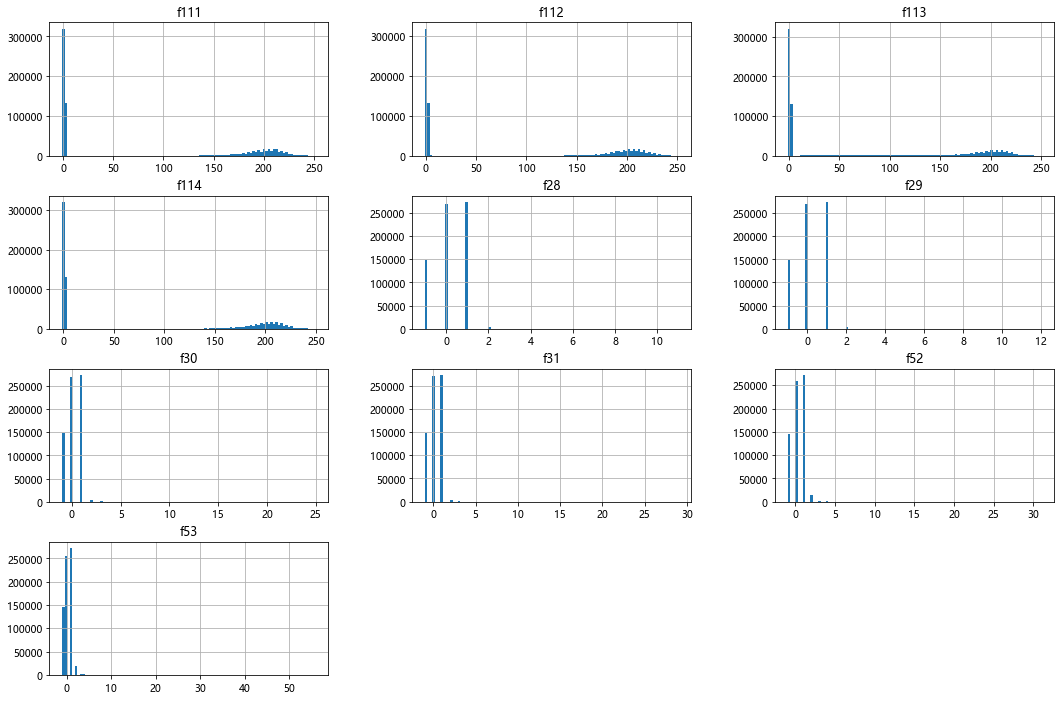

In [60]:
def preprocess_features(anti_fraud_dataframe):
    selected_features = anti_fraud_dataframe[
        ["f28", "f29", "f30", "f31", "f52", "f53", "f111", "f112", "f113", "f114"]]
    processed_features = selected_features.copy()
#     processed_features = processed_features.fillna(processed_features.mean())
    processed_features = processed_features.fillna(-1)
    return processed_features

training_examples = preprocess_features(anti_fraud_dataframe.head(696312))
display.display(training_examples.describe())
_ = training_examples.hist(bins=100, figsize=(18, 12))